<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter10/Human_pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2
%cd /content/detectron2
%pip install -r requirements.txt
!python setup.py install
%pip install git+https://github.com/facebookresearch/fvcore.git
%cd /content/

%pip install torch_snippets
%pip install pyyaml==5.1 pycocotools>=2.0.1

/content
Cloning into 'detectron2'...
remote: Enumerating objects: 15725, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (336/336), done.
remote: Total 15725 (delta 201), reused 302 (delta 103), pack-reused 15277
Receiving objects: 100% (15725/15725), 6.51 MiB | 21.17 MiB/s, done.
Resolving deltas: 100% (11313/11313), done.
/content/detectron2
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Restart your notebook after running above cell.  
Once restarted, you can directly start running below cells

In [1]:
from torch_snippets import *
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [2]:
cfg = get_cfg() # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))

In [3]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

[06/08 15:43:49 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl ...


In [6]:
from torch_snippets import read, resize
!wget -q https://upload.wikimedia.org/wikipedia/commons/e/ef/Bydgoszcz_2016_IAAF_World_U20_Championships%2C_200m_women_semi-final3_22-07-2016.jpg -O image.png
im = read('image.png',1)
im = resize(im, 0.5) # resize image to half its dimensions

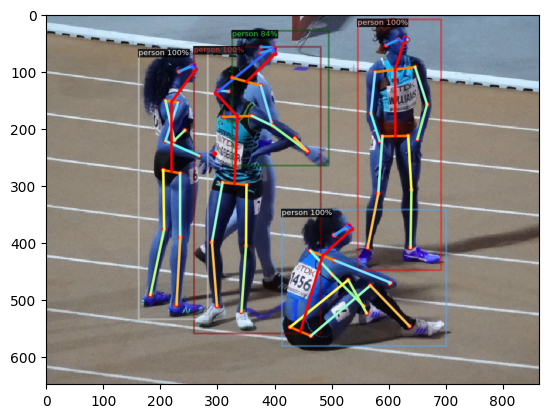

In [7]:
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(out.get_image())